In [1]:
# pip install nltk

In [2]:
import nltk 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
nltk.corpus.gutenberg.fileids()


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
aiw = nltk.corpus.gutenberg.raw("milton-paradise.txt")
word_tokens = word_tokenize(aiw.lower())
#word_tokens

In [4]:
sw = set(nltk.corpus.stopwords.words('english'))
#sw

In [5]:
# nltk.download('punkt')
# nltk.download('punkt_tab')

In [6]:
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(word) for word in word_tokens if word.isalpha() and word not in sw]
#print(words)

In [7]:
word_count = Counter(words)
top_words = word_count.most_common(20)
print(top_words)

[('thou', 432), ('heaven', 425), ('thy', 412), ('thee', 358), ('thus', 318), ('god', 307), ('shall', 283), ('yet', 228), ('though', 217), ('earth', 215), ('u', 187), ('man', 174), ('first', 169), ('day', 151), ('high', 149), ('one', 141), ('son', 132), ('far', 128), ('death', 127), ('may', 126)]


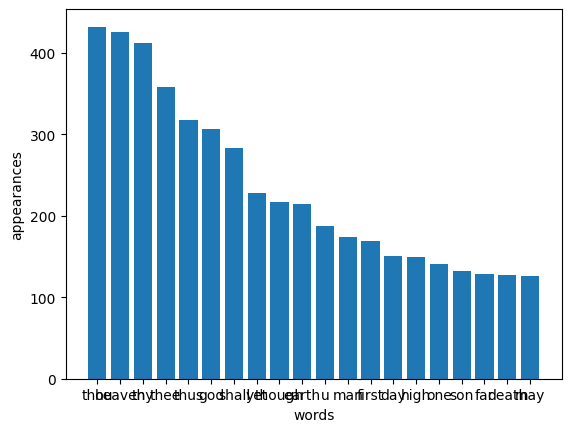

<Figure size 3000x600 with 0 Axes>

In [8]:
words, count = zip(*top_words)
plt.bar(words, count)
plt.xlabel('words')
plt.ylabel('appearances')
plt.figure(figsize=(30,6))
plt.show()

I chose lemmatization because it considers contexts and converts words to their original meaning. It is more accurate than stemming.

In [9]:
#nltk.download('vader_lexicon')

In [10]:
analyzer = SentimentIntensityAnalyzer()
text = sent_tokenize(aiw)

In [11]:
sentiment = [(sentence, analyzer.polarity_scores(sentence)) for sentence in text]
#print(sentiment)

In [12]:
positive = sorted(sentiment, key= lambda x: x[1]['pos'], reverse=True)[:5]
neutral = sorted(sentiment, key= lambda x: x[1]['neu'], reverse=True)[:5]
negative = sorted(sentiment, key= lambda x: x[1]['neg'], reverse=True)[:5]

print('most positive sentences:')
for sentence, score in positive:
    print(f"{sentence}\nScore: {score}\n")

most positive sentences:
O friends!
Score: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5255}

O Heaven!
Score: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5562}

O Friends!
Score: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5255}

O Heaven!
Score: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5562}

She fair, divinely fair, fit love for Gods!
Score: {'neg': 0.0, 'neu': 0.162, 'pos': 0.838, 'compound': 0.9381}



In [13]:
print('most neutral sentences:')
for sentence, score in neutral:
    print(f"{sentence}\nScore: {score}\n")

most neutral sentences:
Oh how unlike the place from whence they fell!
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

But see!
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Him, haply slumbering on the Norway foam, 
The pilot of some small night-foundered skiff, 
Deeming some island, oft, as seamen tell, 
With fixed anchor in his scaly rind, 
Moors by his side under the lee, while night 
Invests the sea, and wished morn delays.
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Such resting found the sole 
Of unblest feet.
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Awake, arise, or be for ever fallen!"
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}



In [14]:
print('most negative sentences:')
for sentence, score in negative:
    print(f"{sentence}\nScore: {score}\n")

most negative sentences:
No!
Score: {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3595}

O Hell!
Score: {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.7088}

Alas!
Score: {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3382}

Me miserable!
Score: {'neg': 0.777, 'neu': 0.223, 'pos': 0.0, 'compound': -0.5411}

Sad cure!
Score: {'neg': 0.772, 'neu': 0.228, 'pos': 0.0, 'compound': -0.5255}



I think the sentences and their sentiment analysis are accurate, because is based off the score which is a negative, positive, or null number, depending on the words included in the tokenized sentence.

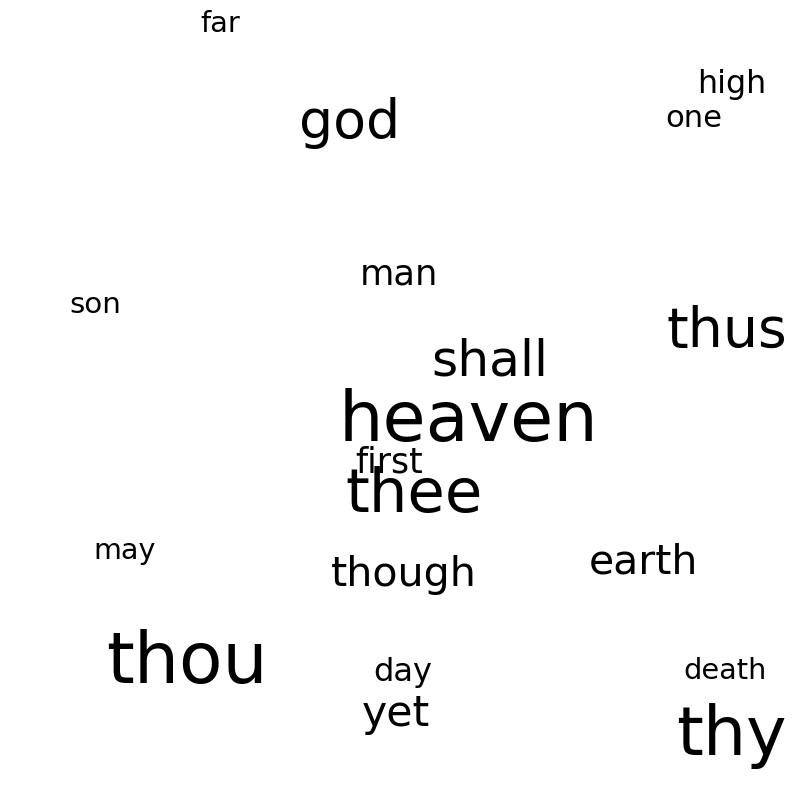

In [ ]:
top_20 = ({'thou':432, 'heaven':425, 'thy':412, 'thee': 358, 'thus': 318, 'god': 307, 'shall': 283,
        'yet': 228, 'though': 217, 'earth': 215, 'man': 174, 'first': 169, 'day':151, 
        'high': 149, 'one': 141, 'son': 132, 'far': 128, 'death': 127, 'may': 126
}) 


def text_size(total: int) -> float:
    """"equals 8 if total is 0, 28 if total is 200"""
    return 8 + total / 200 * 20

plt.figure(figsize=(10,5))
#np.random.seed(42)
x_position = np.random.uniform(0,10, len(top_20))
y_position = np.random.uniform(0,10, len(top_20))

for i, (word, count) in enumerate(top_20.items()):
    plt.text(x_position[i],y_position[i],word, ha='center', va='center',
             size=text_size(count))
    
plt.axis("off")
plt.xlim(0,10)
plt.ylim(0,5)
plt.show()